In [28]:
import nltk

# modules that are required:
# 1 brown
# 2 gutenberg
# 3 max_ne_chunker
# 4 movie_reviews
# 5 product_reviews_1
# 6 punkt
# 7 treebank
# 8 twitter_samples
# 9 universal_tagset
# 10 webtext
# 11 wordnet
# 12 words
#nltk.download()

In [2]:
import matplotlib.pyplot as plt

# Tokenization

In [29]:
from nltk.corpus import twitter_samples as ts

In [30]:
ts.fileids()

['negative_tweets.json', 'positive_tweets.json', 'tweets.20150430-223406.json']

In [31]:
samples_tw = ts.strings('tweets.20150430-223406.json')

In [32]:
samples_tw[500]

'RT @Battsby: Ed Miliband appears to be dying on his lying arse here. \n\n#bbcqt \n\nThe spray-tanned mask is slipping.'

In [33]:
from nltk.tokenize import word_tokenize as wtoken

In [34]:
wtoken(samples_tw[500])

['RT',
 '@',
 'Battsby',
 ':',
 'Ed',
 'Miliband',
 'appears',
 'to',
 'be',
 'dying',
 'on',
 'his',
 'lying',
 'arse',
 'here',
 '.',
 '#',
 'bbcqt',
 'The',
 'spray-tanned',
 'mask',
 'is',
 'slipping',
 '.']

In [35]:
from nltk.tokenize import wordpunct_tokenize as wtoken2

In [36]:
wtoken2(samples_tw[500])

['RT',
 '@',
 'Battsby',
 ':',
 'Ed',
 'Miliband',
 'appears',
 'to',
 'be',
 'dying',
 'on',
 'his',
 'lying',
 'arse',
 'here',
 '.',
 '#',
 'bbcqt',
 'The',
 'spray',
 '-',
 'tanned',
 'mask',
 'is',
 'slipping',
 '.']

In [37]:
from nltk import regexp_tokenize

In [38]:
patn = '\w+'
regexp_tokenize(samples_tw[500],patn)

['RT',
 'Battsby',
 'Ed',
 'Miliband',
 'appears',
 'to',
 'be',
 'dying',
 'on',
 'his',
 'lying',
 'arse',
 'here',
 'bbcqt',
 'The',
 'spray',
 'tanned',
 'mask',
 'is',
 'slipping']

In [39]:
#regular expression that detects words along with a few punctuation characters:
patn = '\w+|[!,\-,]' 
regexp_tokenize(samples_tw[500],patn)

['RT',
 'Battsby',
 'Ed',
 'Miliband',
 'appears',
 'to',
 'be',
 'dying',
 'on',
 'his',
 'lying',
 'arse',
 'here',
 'bbcqt',
 'The',
 'spray',
 '-',
 'tanned',
 'mask',
 'is',
 'slipping']

# Stemming

In [40]:
from nltk.stem import PorterStemmer

In [41]:
stemming = PorterStemmer()
print(stemming.stem("enjoying"),stemming.stem("enjoys"),stemming.stem("enjoyable"))

enjoy enjoy enjoy


In [42]:
# Stemming does not always produce a stem that is a word by itself, as shown in the following example:
print(stemming.stem("variation"),stemming.stem("variate"))

variat variat


In [43]:
#we can create custom stemmers, using the following regular expressions:
from nltk.stem import RegexpStemmer
regexp_stemmer = RegexpStemmer("able$|ing$",min=4)

In [44]:
print(regexp_stemmer.stem("flyable"),regexp_stemmer.stem("flying"))

fly fly


# Removing stop words

In [45]:
from nltk.corpus import stopwords
sw_l = stopwords.words('english')

In [46]:
print(len(sw_l),sw_l[20:40])

179 ['himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this']


In [47]:
example_text = "This is an example sentence to test stopwords"
example_text_without_stopwords=[word for word in example_text.split() if word not in sw_l]
example_text_without_stopwords

['This', 'example', 'sentence', 'test', 'stopwords']

In [48]:
from nltk.corpus import gutenberg
words_in_hamlet = gutenberg.words('shakespeare-hamlet.txt')
words_in_hamlet_without_sw = [word for word in words_in_hamlet if word not in sw_l]

In [49]:
len(words_in_hamlet_without_sw)*100.0/len(words_in_hamlet)

69.26124197002142

# Exploratory analysis of text

In [50]:
from nltk.corpus import webtext
webtext_sentences = webtext.sents('firefox.txt')
# Firefox discussion forum (firefox.txt)

In [51]:
webtext_sentences = webtext.sents('firefox.txt')
webtext_words = webtext.words('firefox.txt')
print(len(webtext_sentences),len(webtext_words))

1142 102457


In [52]:
vocabulary = set(webtext_words)
len(vocabulary)

8296

In [53]:
frequency_dist = nltk.FreqDist(webtext_words)
sorted(frequency_dist,key=frequency_dist.__getitem__,reverse=True)[0:30]

['.',
 'in',
 'to',
 '"',
 'the',
 "'",
 'not',
 '-',
 'when',
 'on',
 'a',
 'is',
 't',
 'and',
 'of',
 '(',
 'page',
 'for',
 'with',
 ')',
 'window',
 'Firefox',
 'does',
 'from',
 'open',
 ':',
 'menu',
 'should',
 'bar',
 'tab']

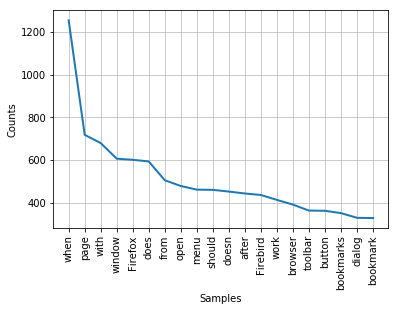

In [54]:
large_words = dict([(k,v) for k,v in frequency_dist.items() if len(k)>3])
frequency_dist = nltk.FreqDist(large_words)
frequency_dist.plot(20,cumulative=False)
plt.show()

In [55]:
!pip install wordcloud

In [56]:
from wordcloud import WordCloud

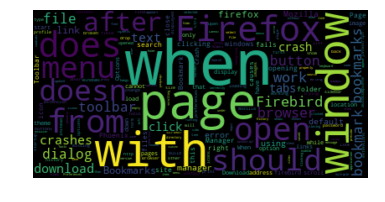

In [57]:
wcloud = WordCloud().generate_from_frequencies(frequency_dist)
plt.imshow(wcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [58]:
# without stopwords
words_in_webtext_without_sw = [word for word in webtext_words if word not in sw_l]


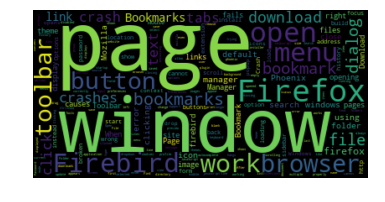

In [59]:
frequency_dist2 = nltk.FreqDist(words_in_webtext_without_sw)
large_words2 = dict([(k,v) for k,v in frequency_dist2.items() if len(k)>3])
frequency_dist3 = nltk.FreqDist(large_words2)
wcloud = WordCloud().generate_from_frequencies(frequency_dist3)
plt.imshow(wcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

# POS tagging